In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
import seaborn as sns

In [3]:
# import some data to play with
iris = sns.load_dataset("iris")

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
iris['species']= label_encoder.fit_transform(iris['species']) 

In [6]:
x=iris.iloc[:,0:4]
y=iris['species']

In [7]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [9]:
iris['species'].unique()

array([0, 1, 2])

In [10]:
iris.species.value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [11]:
colnames = list(iris.columns)
colnames

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [12]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

# Building Decision Tree Classifier using Entropy Criteria

In [13]:
model = DecisionTreeClassifier(criterion = 'gini',min_samples_split=5,max_depth=4,max_leaf_nodes=20)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=20, min_samples_split=5)

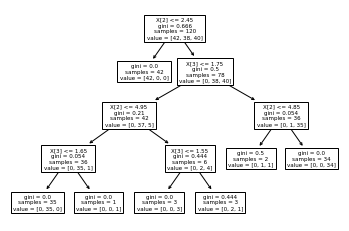

In [14]:
#PLot the decision tree
tree.plot_tree(model);

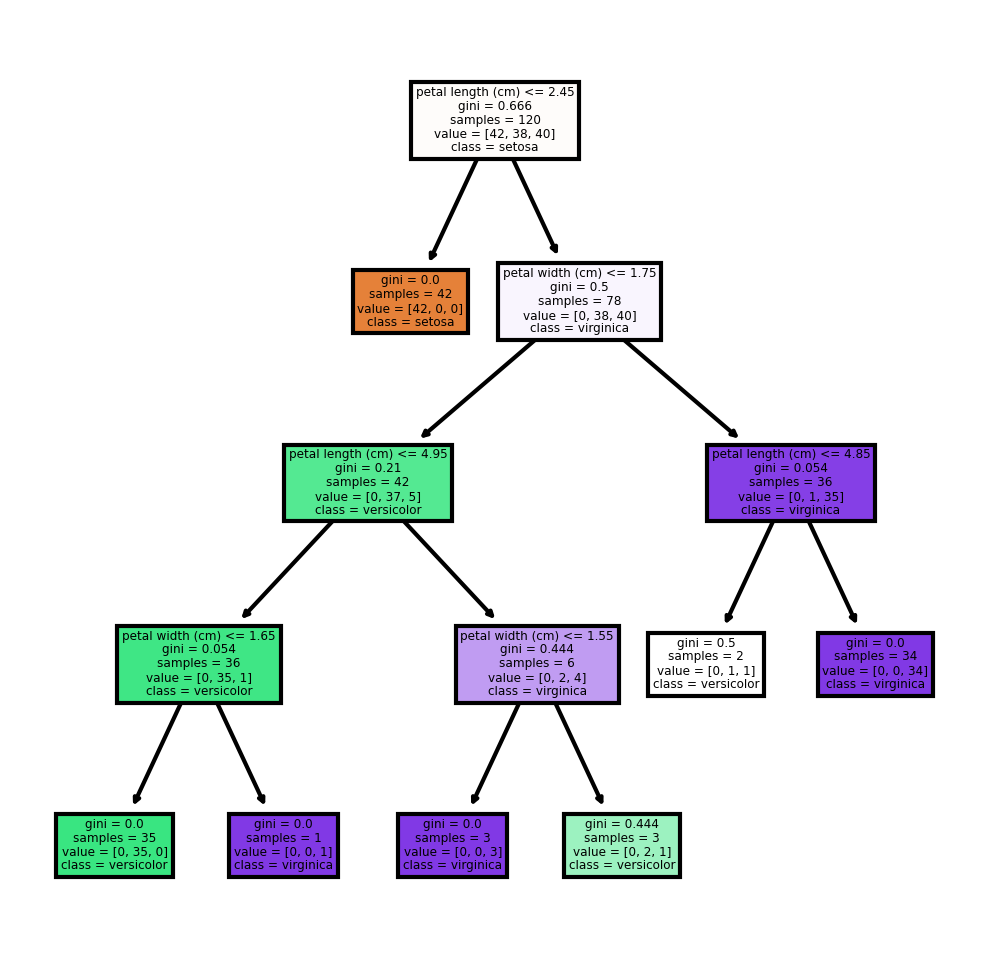

In [15]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [16]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    13
2     9
0     8
dtype: int64

In [17]:
preds

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [18]:
print(classification_report(y_test,preds)) # getting the 2 way table to understand the correct and wrong predictions

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.92      1.00      0.96        12
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# Building Decision Tree Classifier (CART) using Gini Criteria

In [19]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [20]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [21]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.9666666666666667

# Decision Tree Regression Example

In [22]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [23]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
array = iris.values
X = array[:,0:3]
y = array[:,3]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [26]:
model = DecisionTreeRegressor( max_depth=3,min_samples_split=5)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_split=5)

In [27]:
#Find the accuracy
#??dpi
#model.score(X_test,y_test)

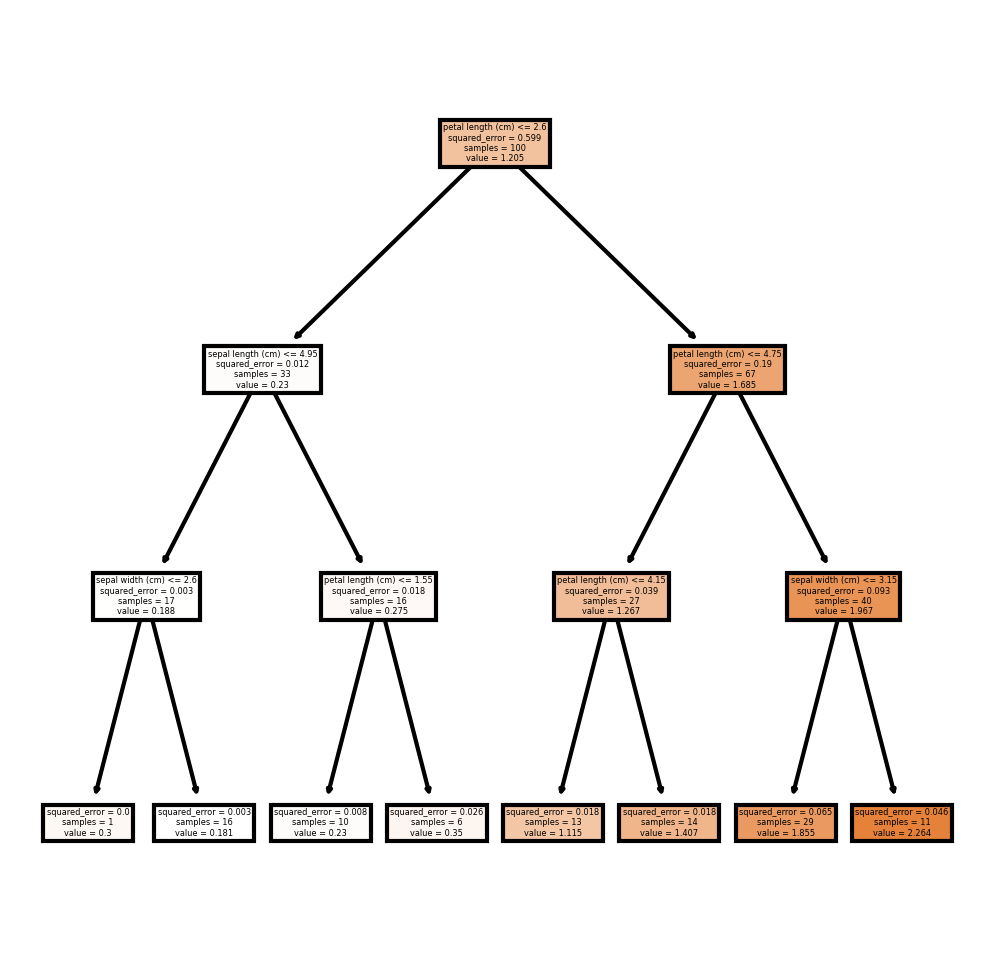

In [28]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)']
cn=['petal width (cm)']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [29]:
iris.petal_width.value_counts()

0.2    29
1.3    13
1.8    12
1.5    12
1.4     8
2.3     8
1.0     7
0.4     7
0.3     7
2.1     6
2.0     6
0.1     5
1.2     5
1.9     5
1.6     4
2.5     3
2.2     3
2.4     3
1.1     3
1.7     2
0.6     1
0.5     1
Name: petal_width, dtype: int64